In [148]:
#import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [149]:
#Load the file

bike_rental_data = pd.read_csv("C:/Users/monish/Documents/Divya/Edwisor/Project Bike Rental Count/day.csv") 

In [150]:
#Number of rows & var

bike_rental_data.shape

(731, 16)

In [151]:
bike_rental_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [152]:
#Check if any missing values present in the file

bike_rental_data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [154]:
# Check the summary of the data
data_continuous_var = bike_rental_data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
data_continuous_var.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


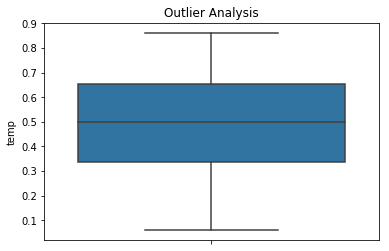

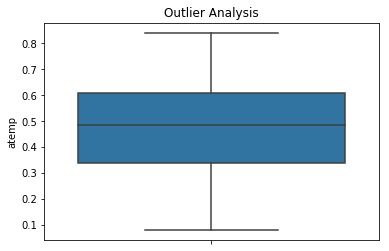

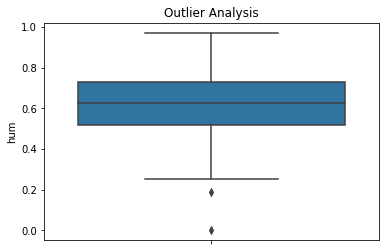

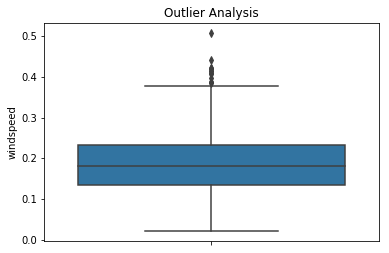

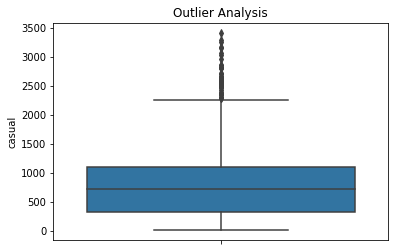

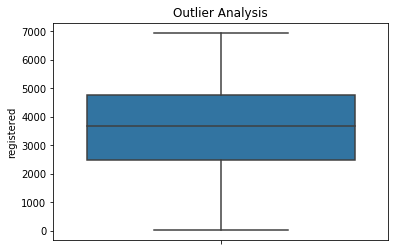

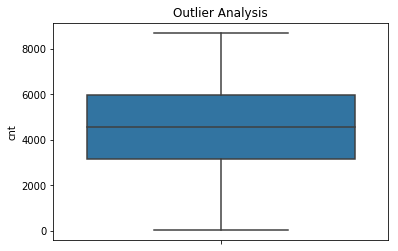

In [160]:
for i , name in enumerate(data_continuous_var):
        plt.title('Outlier Analysis')
      #  plt.xlabel(name)
      #  plt.ylabel('Count')
        sns.boxplot(y = bike_rental_data[name])
        plt.show()
        #save_results_to = 'C:/Users/monish/Documents/Divya/Edwisor/Project Bike Rental Count/Graphs/'
        #plt.savefig(save_results_to + name + 'image.png', dpi = 300)


In [57]:
#bike_rental_data['hum'].describe()
#bike_rental_data[ (bike_rental_data['hum'] < 0.2)]
#bike_rental_data[ (bike_rental_data['weathersit'] == 1)].mean()
bike_rental_data['hum'].replace(0.187917,0.507463,inplace=True)
bike_rental_data['hum'].replace(0.0,0.507463,inplace=True)
bike_rental_data['windspeed'].replace(0.507463,0.187917,inplace=True)

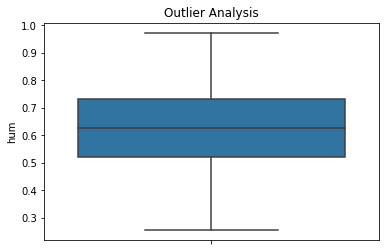

In [59]:
        plt.title('Outlier Analysis')
        sns.boxplot(y = bike_rental_data['hum'])
        plt.show()

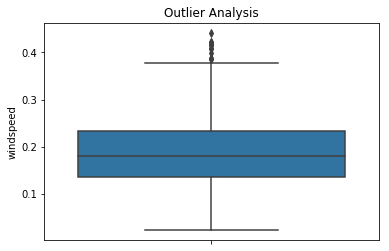

In [60]:
        plt.title('Outlier Analysis')
        sns.boxplot(y = bike_rental_data['windspeed'])
        plt.show()

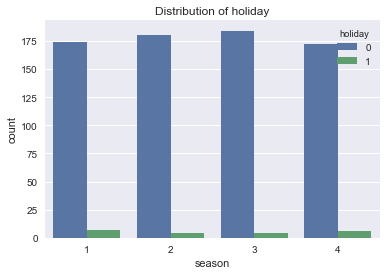

In [143]:
#plt.subplot(443)
#plt.ylabel('Density')
plt.title('Distribution of Season')
sns.countplot(x="season",data = bike_rental_data,hue ="holiday")

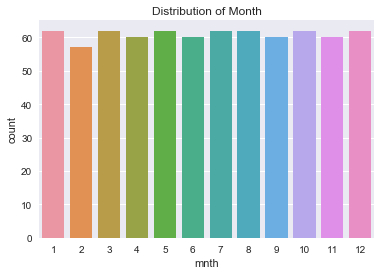

In [146]:
#plt.subplot(443)
#plt.ylabel('Density')
plt.title('Distribution of Month')
sns.countplot(x="mnth",data = bike_rental_data)

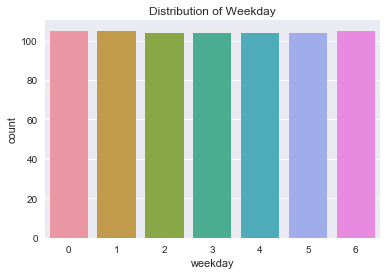

In [149]:
#plt.subplot(443)
#plt.ylabel('Density')
plt.title('Distribution of Weekday')
sns.countplot(x="weekday",data = bike_rental_data)

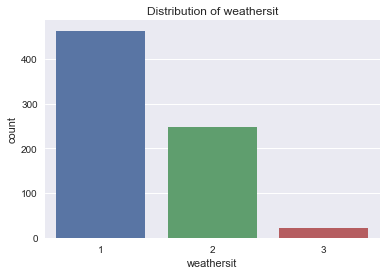

In [151]:
#plt.subplot(443)
#plt.ylabel('Density')
plt.title('Distribution of weathersit')
sns.countplot(x="weathersit",data = bike_rental_data)


In [65]:
bike_rental_data['dteday']=bike_rental_data['dteday'].astype('datetime64')

In [68]:
data_30 = bike_rental_data[:24]


Text(0.5,1,'Date(24 days) vs Total_count')

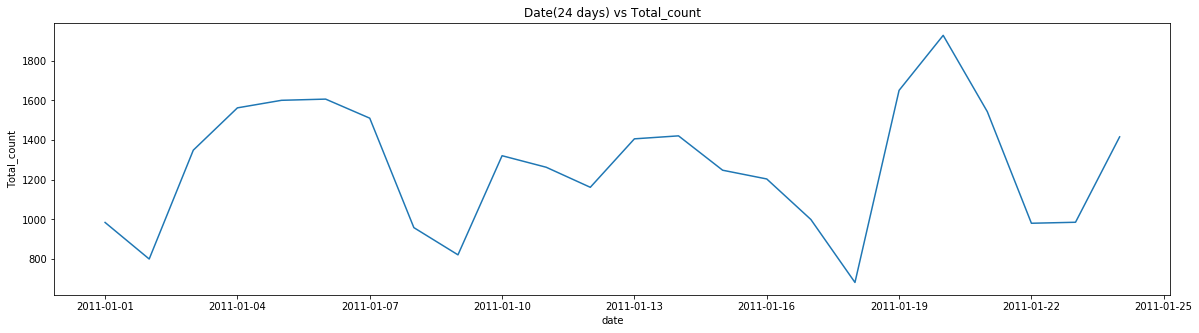

In [72]:
plt.figure(figsize=(20,5))
plt.plot(data_30['dteday'],data_30['cnt'])
plt.xlabel('date')
plt.ylabel('Total_count')
plt.title('Date(24 days) vs Total_count')

In [73]:
names =  ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']

Text(0.5,1,'Correlation between variables')

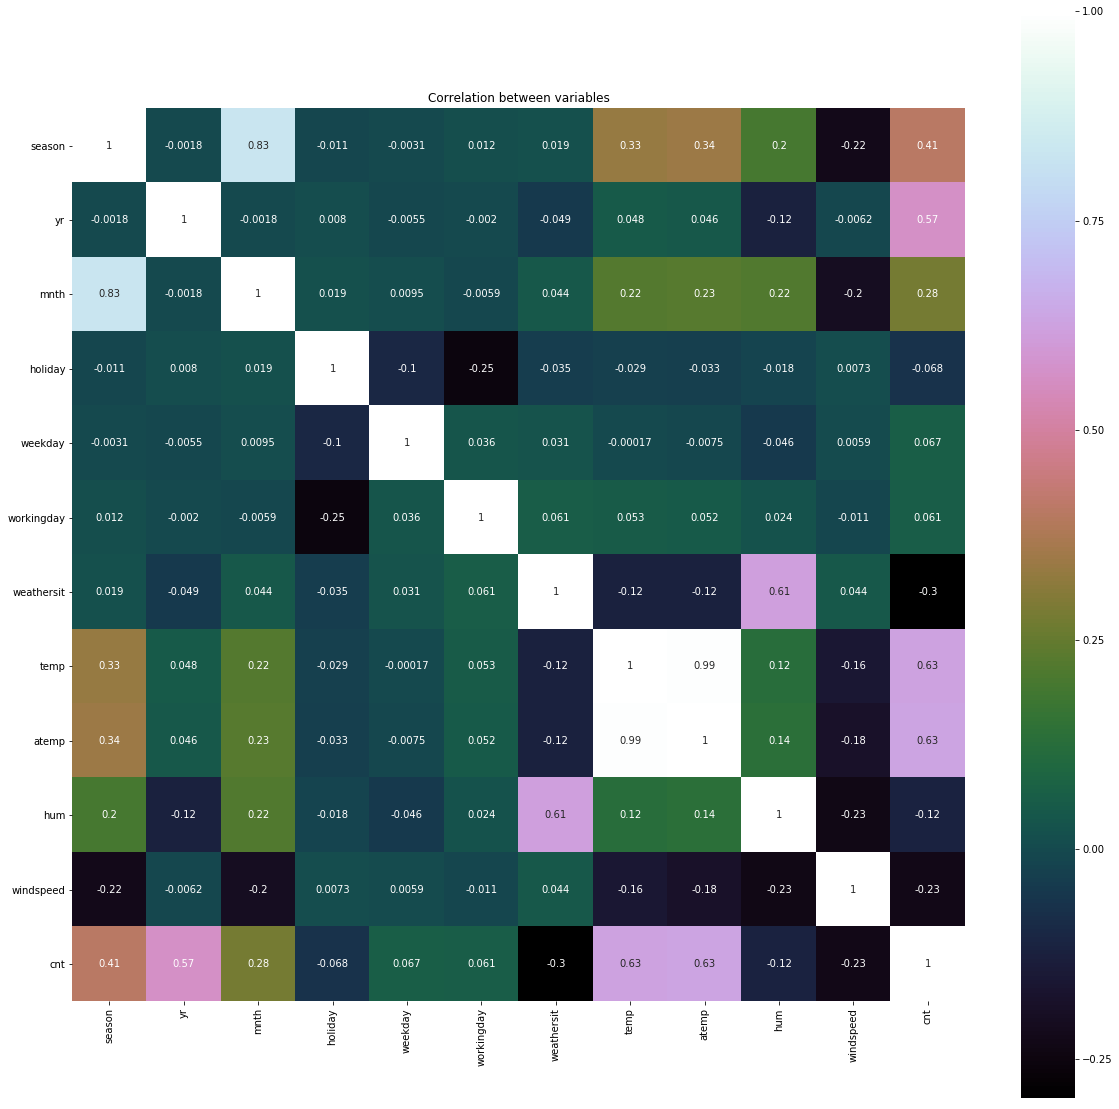

In [76]:
plt.figure(figsize = (20,20))
g = sns.heatmap(bike_rental_data[names].corr(), vmax=1, square=True,annot=True,cmap='cubehelix',xticklabels=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between variables')

In [81]:
bike_rental_data.shape

(731, 16)

In [88]:
x=pd.DatetimeIndex(bike_rental_data['dteday'])

In [89]:
x = x.day
bike_rental_data['day'] = x

In [100]:
columns = ['day','season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']

In [101]:
bike_rental_data1 = bike_rental_data[columns]

In [106]:
bike_rental_data1.columns

Index(['day', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [110]:
X = bike_rental_data1.values[:, 0:11]
Y = bike_rental_data1.values[:,11]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [111]:
X_train

array([[ 5.       ,  2.       ,  1.       , ...,  0.621667 ,  0.756667 ,
         0.152992 ],
       [ 2.       ,  4.       ,  0.       , ...,  0.314167 ,  0.625833 ,
         0.100754 ],
       [11.       ,  1.       ,  1.       , ...,  0.274167 ,  0.8475   ,
         0.131221 ],
       ...,
       [11.       ,  3.       ,  0.       , ...,  0.653333 ,  0.71375  ,
         0.115054 ],
       [ 8.       ,  4.       ,  0.       , ...,  0.265833 ,  0.58     ,
         0.240058 ],
       [22.       ,  4.       ,  0.       , ...,  0.4225   ,  0.629167 ,
         0.0926667]])

In [131]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import GridSearchCV

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))


904.9126026958146
0.7608113971385806


In [132]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Reg = DecisionTreeRegressor()
Reg = DecisionTreeRegressor(max_depth=6,min_samples_split=4,min_samples_leaf=1)

Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

708.8247296087469
0.8532409369327296


In [125]:
# Adaboost with decision tree

from sklearn.ensemble import AdaBoostRegressor
Reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),n_estimators=150)

Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

676.4051900142229
0.8663585831847741


In [127]:
from sklearn.ensemble import RandomForestRegressor

Reg = RandomForestRegressor(n_jobs=-1,n_estimators=260,max_depth=10,min_impurity_decrease=4,min_samples_leaf=1,
                           bootstrap=True)

Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

611.638404736183
0.8907260347904232


In [141]:
# xgboost
import xgboost as xgb
from xgboost import XGBRegressor

Reg = XGBRegressor(n_jobs=-1,n_estimators=150,max_depth=3,min_child_weight=6,gamma=0,subsample=0.7
                ,colsample_bytree=0.9,reg_alpha=0.08,learning_rate=0.08)



Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

641.6407354246688
0.8797428064274979
